# Binary classification with Random Forest

In this experiment, I aim to determine how well a Random Forest can predict the target feature.



## Import packages and load the dataset

In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import altair as alt
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 


I have created a public reprository on my github and uploaded the dataset

In [ ]:
url = 'https://raw.githubusercontent.com/bhutanisaumya/MLAA_AT2/main/repurchase_training.csv'

df = pd.read_csv(url)


In [ ]:
#the column Id as the first column
df.set_index('ID', inplace = True)


## Data Exploration
I will be performing data explorations on datasets.

In [ ]:
#Displays first 5 rows of the dataframe 
df.head()

,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
ID,,,,,,,,,,,,,,,,
1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [ ]:
#Displays last 5 rows of the dataframe 
df.tail()

,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
ID,,,,,,,,,,,,,,,,
154134,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
154135,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
154137,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
154138,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10
154139,1,NaN,NaN,model_1,LCV,6,1,7,1,10,10,5,3,4,9,10


In [ ]:
#Generate descriptive statistics for the numeric type column
df.describe()

,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
#Print information about the datafram on the index dtype and columns, non-null values and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131337 entries, 1 to 154139
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   Target                     131337 non-null  int64 
 1   age_band                   18962 non-null   object
 2   gender                     62029 non-null   object
 3   car_model                  131337 non-null  object
 4   car_segment                131337 non-null  object
 5   age_of_vehicle_years       131337 non-null  int64 
 6   sched_serv_warr            131337 non-null  int64 
 7   non_sched_serv_warr        131337 non-null  int64 
 8   sched_serv_paid            131337 non-null  int64 
 9   non_sched_serv_paid        131337 non-null  int64 
 10  total_paid_services        131337 non-null  int64 
 11  total_services             131337 non-null  int64 
 12  mth_since_last_serv        131337 non-null  int64 
 13  annualised_mileage         131337 non-null  

In [ ]:
#rows and columns in the dataframe
df.shape

(131337, 16)

In [ ]:
#check the skewness of the data
print(df.skew())

Target                       5.859128
age_of_vehicle_years         0.023906
sched_serv_warr              0.021495
non_sched_serv_warr          0.015396
sched_serv_paid              0.020868
non_sched_serv_paid          0.004243
total_paid_services          0.010846
total_services               0.027122
mth_since_last_serv          0.019794
annualised_mileage           0.000665
num_dealers_visited          0.005518
num_serv_dealer_purchased    0.010470
dtype: float64


In [ ]:
#variance of various columns in the data
print(df.var())

Target                       0.026090
age_of_vehicle_years         8.084347
sched_serv_warr              8.319348
non_sched_serv_warr          8.240719
sched_serv_paid              8.332043
non_sched_serv_paid          8.286906
total_paid_services          8.296752
total_services               8.271151
mth_since_last_serv          8.178203
annualised_mileage           8.150432
num_dealers_visited          8.275815
num_serv_dealer_purchased    8.222694
dtype: float64


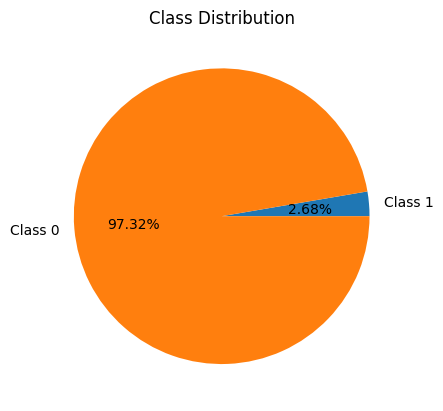

In [ ]:
# Define labels for the pie chart
my_labels = ['Class 1', 'Class 0']

# Count the number of rows for each class and store in a list
class_div = [df[df['Target'] == 1].shape[0], df[df['Target'] == 0].shape[0]]

# Calculate the percentage of each class
total_rows = df.shape[0]
class_percentages = [round(count / total_rows * 100, 2) for count in class_div]

# Plot the pie chart with labels and percentages
plt.pie(class_div, labels=my_labels, autopct='%1.2f%%')
plt.title("Class Distribution")
plt.show()


The above pie chat shows that the Dependent feature is highly imbalanced. Class 1 represents if the customer has purchased more than one vehicle and class 0 represents if the customer owns a single vehicle.

## Data Preparation and cleaning

In [ ]:
#sum of null values in the dataframe
df.isnull().sum()

Target                            0
age_band                     112375
gender                        69308
car_model                         0
car_segment                       0
age_of_vehicle_years              0
sched_serv_warr                   0
non_sched_serv_warr               0
sched_serv_paid                   0
non_sched_serv_paid               0
total_paid_services               0
total_services                    0
mth_since_last_serv               0
annualised_mileage                0
num_dealers_visited               0
num_serv_dealer_purchased         0
dtype: int64

<Axes: ylabel='ID'>

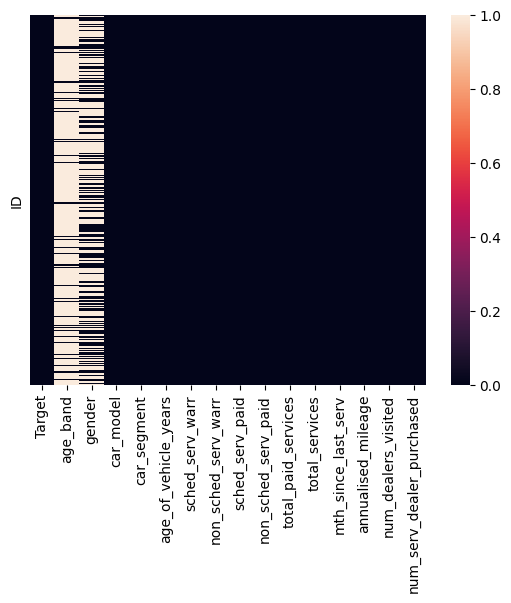

In [ ]:
#heatmap highlighing null values in the dataframe
sns.heatmap(df.isnull(), yticklabels = False)

In [ ]:
#percentage of null values in the dataframe
df.isnull().sum()/(len(df))*100

Target                        0.000000
age_band                     85.562332
gender                       52.771116
car_model                     0.000000
car_segment                   0.000000
age_of_vehicle_years          0.000000
sched_serv_warr               0.000000
non_sched_serv_warr           0.000000
sched_serv_paid               0.000000
non_sched_serv_paid           0.000000
total_paid_services           0.000000
total_services                0.000000
mth_since_last_serv           0.000000
annualised_mileage            0.000000
num_dealers_visited           0.000000
num_serv_dealer_purchased     0.000000
dtype: float64

As features, 'age_band' and 'gender' has a high percentage of missing values which is more than 85% and 52% respectively. Therefore, I will not take it into consideration for my analysis. 

In [ ]:
#copy the dataframe
df_clean = df.copy()

In [ ]:
#Drop the original 'age_band' and 'gender' columns
df_clean.drop('age_band', axis=1, inplace=True)
df_clean.drop('gender', axis=1, inplace = True)

In [ ]:
#check for null values after removing the columns
df_clean.isnull().sum()

Target                       0
car_model                    0
car_segment                  0
age_of_vehicle_years         0
sched_serv_warr              0
non_sched_serv_warr          0
sched_serv_paid              0
non_sched_serv_paid          0
total_paid_services          0
total_services               0
mth_since_last_serv          0
annualised_mileage           0
num_dealers_visited          0
num_serv_dealer_purchased    0
dtype: int64

In [ ]:
#number of categories in categorical feature 'car_model'
df_clean['car_model'].nunique()

19

In [ ]:
#count of different categories in 'car_model'
df_clean['car_model'].value_counts()

model_2     34491
model_5     24674
model_3     17074
model_1     15331
model_4     15155
model_7      8167
model_8      6443
model_10     3215
model_6      3071
model_9       994
model_13      714
model_12      614
model_11      612
model_15      334
model_17      153
model_16      114
model_18      101
model_14       78
model_19        2
Name: car_model, dtype: int64

There are a total of 19 different models. However, the number of models are less than 800 starting from model_11 to model_19.
Therefore, I will group the models from 11 to 19 in a separate category called 'others'.
This will reduce the number of categories from 19 models to 10 models.

In [ ]:
#grouping models together having count less than 800
model_counts = df_clean['car_model'].value_counts()
models_to_group = model_counts[model_counts < 800].index.tolist()
df_clean.loc[df_clean['car_model'].isin(models_to_group), 'car_model'] = 'Others'

In [ ]:
#reduced number of categories in 'car_model'
df_clean['car_model'].value_counts()

model_2     34491
model_5     24674
model_3     17074
model_1     15331
model_4     15155
model_7      8167
model_8      6443
model_10     3215
model_6      3071
Others       2722
model_9       994
Name: car_model, dtype: int64

In [ ]:
#number of categories in categorical feature 'car_segment'
df_clean['car_segment'].nunique()

4

In [ ]:
#count of different categories in 'car_segment'
df_clean['car_segment'].value_counts()

Small/Medium    54553
Large/SUV       52120
LCV             24606
Other              58
Name: car_segment, dtype: int64

## Data Splitting

In [ ]:
# separting the dependent and independent features in y and X repectively
y = df_clean.pop('Target')
X = df_clean

Creating Test datasets

In [ ]:
# importing necessary libraries
from sklearn.model_selection import train_test_split

# Split the dependent features and target variable into 2 different sets (data and test) with 80-20 ratio
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

Creating train and validation datasets

In [ ]:
# Split the features and target variable into 2 different sets (training and validation) with 75-25 ratio
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.25, random_state=40)

In [ ]:
df_train = pd.concat([X_train, y_train], axis =1)
df_test = pd.concat([X_test, y_test], axis =1)
df_val = pd.concat([X_val, y_val], axis =1)

In [ ]:
#rows and columns in the training dataframe
df_train.shape

(78801, 14)

In [ ]:
#rows and columns in the validation dataframe
df_val.shape

(26268, 14)

In [ ]:
#rows and columns in the testing dataframe
df_test.shape

(26268, 14)

## Handling categorical features
For the categorical features, I will be using One Hot Encoding to convert the features to numeric type.

In [ ]:
# Categorical columns
cat_cols = ['car_segment','car_model'] 

In [ ]:
# One hot encode the categorical columns by using the "get_dummies" function from pandas
X_train = pd.get_dummies(X_train, columns=cat_cols)

X_val = pd.get_dummies(X_val, columns=cat_cols)

X_test = pd.get_dummies(X_test, columns=cat_cols)

Verifying the columns in each of the dataframes

In [ ]:
X_train.dtypes

age_of_vehicle_years         int64
sched_serv_warr              int64
non_sched_serv_warr          int64
sched_serv_paid              int64
non_sched_serv_paid          int64
total_paid_services          int64
total_services               int64
mth_since_last_serv          int64
annualised_mileage           int64
num_dealers_visited          int64
num_serv_dealer_purchased    int64
car_segment_LCV              uint8
car_segment_Large/SUV        uint8
car_segment_Other            uint8
car_segment_Small/Medium     uint8
car_model_Others             uint8
car_model_model_1            uint8
car_model_model_10           uint8
car_model_model_2            uint8
car_model_model_3            uint8
car_model_model_4            uint8
car_model_model_5            uint8
car_model_model_6            uint8
car_model_model_7            uint8
car_model_model_8            uint8
car_model_model_9            uint8
dtype: object

In [ ]:
X_val.dtypes

age_of_vehicle_years         int64
sched_serv_warr              int64
non_sched_serv_warr          int64
sched_serv_paid              int64
non_sched_serv_paid          int64
total_paid_services          int64
total_services               int64
mth_since_last_serv          int64
annualised_mileage           int64
num_dealers_visited          int64
num_serv_dealer_purchased    int64
car_segment_LCV              uint8
car_segment_Large/SUV        uint8
car_segment_Other            uint8
car_segment_Small/Medium     uint8
car_model_Others             uint8
car_model_model_1            uint8
car_model_model_10           uint8
car_model_model_2            uint8
car_model_model_3            uint8
car_model_model_4            uint8
car_model_model_5            uint8
car_model_model_6            uint8
car_model_model_7            uint8
car_model_model_8            uint8
car_model_model_9            uint8
dtype: object

In [ ]:
X_test.dtypes

age_of_vehicle_years         int64
sched_serv_warr              int64
non_sched_serv_warr          int64
sched_serv_paid              int64
non_sched_serv_paid          int64
total_paid_services          int64
total_services               int64
mth_since_last_serv          int64
annualised_mileage           int64
num_dealers_visited          int64
num_serv_dealer_purchased    int64
car_segment_LCV              uint8
car_segment_Large/SUV        uint8
car_segment_Other            uint8
car_segment_Small/Medium     uint8
car_model_Others             uint8
car_model_model_1            uint8
car_model_model_10           uint8
car_model_model_2            uint8
car_model_model_3            uint8
car_model_model_4            uint8
car_model_model_5            uint8
car_model_model_6            uint8
car_model_model_7            uint8
car_model_model_8            uint8
car_model_model_9            uint8
dtype: object

## Resampling of Training data

Class 0: 76724
Class 1: 2077
Proportion: 36.94 : 1


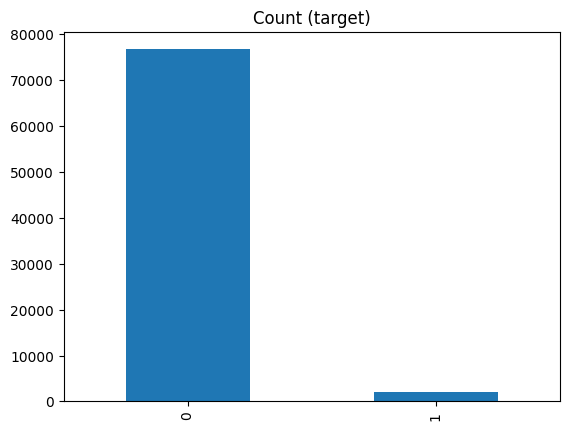

In [ ]:
#barplot showing imbalances in dependent feature
target_count = df_train.Target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

from the above barplot, it is clear that '1' is a minority class. 
Resampling of data is important here as there is a  significant class imbalance, wherein one class represents only a small fraction of the dataset. Thus,the model can be biased towards the majority class and making it difficult to predict the minority class accurately.

Resampling the Minority class
I will be performing oversampling of minority class(1) using SMOTE(Synthetic Minority Over-sampling Technique)

In [ ]:
#intall and load necessary libraries
!pip install imblearn
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Print the number of samples before and after oversampling
print("Before oversampling:")
print(y_train.value_counts())
print("After oversampling:")
print(y_sm.value_counts())

Before oversampling:
0    76724
1     2077
Name: Target, dtype: int64
After oversampling:
0    76724
1    76724
Name: Target, dtype: int64


In [ ]:
X_select = X_sm[['non_sched_serv_paid', 'num_dealers_visited', 'num_serv_dealer_purchased']]
X_val_select = X_val[['non_sched_serv_paid', 'num_dealers_visited', 'num_serv_dealer_purchased']]
X_test_select = X_test[['non_sched_serv_paid', 'num_dealers_visited', 'num_serv_dealer_purchased']]

## Train Initial RandomForest with Default Hyperparameter

In [ ]:
# Import the RandomForestClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Instantiate the RandomForestClassifier class called rf1 with a random state=8
rf1 = RandomForestClassifier(random_state=8)

In [ ]:
# Fit the RandomForest model
rf1.fit(X_sm, y_sm)

RandomForestClassifier(random_state=8)

In [ ]:
# Save its predictions from the training set into y_train_preds
y_train_preds = rf1.predict(X_sm)


In [ ]:
#Import the f1 and precision scores from sklearn
from sklearn.metrics import f1_score, precision_score

# Print f1 score and precision score on training set
f1_score(y_sm, y_train_preds)

0.9999739332169018

In [ ]:
# Save its predictions from the validation set into y_val_preds
y_val_preds = rf1.predict(X_val)

# Print f1 score and precision score on training set
f1_score(y_val, y_val_preds)


0.8081232492997199

## Reduce Overfitting with n_estimators

Train a RandomForestClassifier model with n_estimators=50 

In [ ]:
rf2 = RandomForestClassifier(random_state=8, n_estimators=50).fit(X_sm, y_sm)


In [ ]:
# Save its predictions from the training set into y_train_preds
y_train_preds = rf2.predict(X_sm)


In [ ]:
# Print f1 score and precision score on training set
f1_score(y_sm, y_train_preds)
precision_score(y_sm, y_train_preds)

0.9999478677927224

In [ ]:
# Save its predictions from the validation set into y_val_preds
y_val_preds = rf2.predict(X_val)

# Print f1 score and precision score on training set
f1_score(y_val, y_val_preds)
precision_score(y_val, y_val_preds)


0.8205128205128205

Train a RandomForestClassifier model with n_estimators=70 

In [ ]:
rf3 = RandomForestClassifier(random_state=8, n_estimators=70).fit(X_sm, y_sm)


In [ ]:
# Save its predictions from the training set into y_train_preds
y_train_preds = rf3.predict(X_sm)


In [ ]:
#Import the f1 and precision scores from sklearn
from sklearn.metrics import f1_score, precision_score

# Print f1 score and precision score on training set
f1_score(y_sm, y_train_preds)
precision_score(y_sm, y_train_preds)

0.9999478677927224

In [ ]:
# Save its predictions from the validation set into y_val_preds
y_val_preds = rf3.predict(X_val)

# Print f1 score and precision score on training set
f1_score(y_val, y_val_preds)
precision_score(y_val, y_val_preds)


0.8198581560283688

Train a RandomForestClassifier model with n_estimators=90 

In [ ]:
rf4 = RandomForestClassifier(random_state=8, n_estimators=90).fit(X_sm, y_sm)


In [ ]:
# Save its predictions from the training set into y_train_preds
y_train_preds = rf4.predict(X_sm)


In [ ]:
#Import the f1 and precision scores from sklearn
from sklearn.metrics import f1_score, precision_score

# Print f1 score and precision score on training set
f1_score(y_sm, y_train_preds)
precision_score(y_sm, y_train_preds)

0.9999478677927224

In [ ]:
# Save its predictions from the validation set into y_val_preds
y_val_preds = rf4.predict(X_val)

# Print f1 score and precision score on training set
f1_score(y_val, y_val_preds)
precision_score(y_val, y_val_preds)


0.8194842406876791

Train a RandomForestClassifier model with n_estimators=120 

In [ ]:
rf5 = RandomForestClassifier(random_state=8, n_estimators=120).fit(X_sm, y_sm)


In [ ]:
# Save its predictions from the training set into y_train_preds
y_train_preds = rf5.predict(X_sm)


In [ ]:
# Print f1 score and precision score on training set
f1_score(y_sm, y_train_preds)
precision_score(y_sm, y_train_preds)

0.9999478677927224

In [ ]:
# Save its predictions from the validation set into y_val_preds
y_val_preds = rf5.predict(X_val)

# Print f1 score and precision score on training set
f1_score(y_val, y_val_preds)
precision_score(y_val, y_val_preds)


0.8153409090909091

Train a RandomForestClassifier model with n_estimators=200 

In [ ]:
rf6 = RandomForestClassifier(random_state=8, n_estimators=200).fit(X_sm, y_sm)


In [ ]:
# Save its predictions from the training set into y_train_preds
y_train_preds = rf6.predict(X_sm)


In [ ]:
# Print f1 score and precision score on training set
f1_score(y_sm, y_train_preds)
precision_score(y_sm, y_train_preds)

0.9999478677927224

In [ ]:
# Save its predictions from the validation set into y_val_preds
y_val_preds = rf6.predict(X_val)

# Print f1 score and precision score on training set
f1_score(y_val, y_val_preds)
precision_score(y_val, y_val_preds)


0.8156028368794326

## Reduce Overfitting with max_depth

In [ ]:
#Print the average "**max_depth**" for rf2
np.mean([estimator.tree_.max_depth for estimator in rf2.estimators_])

31.52

Train a RandomForestClassifier model with n_estimators=50, max_depth=15 

In [ ]:
rf3 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=15).fit(X_sm, y_sm)


In [ ]:
# Save its predictions from the training set into y_train_preds
y_train_preds = rf3.predict(X_sm)


In [ ]:
# Print f1 score and precision score on training set
f1_score(y_sm, y_train_preds)
precision_score(y_sm, y_train_preds)

0.9874400518470512

In [ ]:
# Save its predictions from the validation set into y_val_preds
y_val_preds = rf3.predict(X_val)

# Print f1 score and precision score on training set
f1_score(y_val, y_val_preds)
precision_score(y_val, y_val_preds)


0.595602294455067

Train a RandomForestClassifier model with n_estimators=50, max_depth=20

In [ ]:
rf4 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=20).fit(X_sm, y_sm)


In [ ]:
# Save its predictions from the training set into y_train_preds
y_train_preds = rf4.predict(X_sm)


In [ ]:
# Print f1 score and precision score on training set
f1_score(y_sm, y_train_preds)
precision_score(y_sm, y_train_preds)

0.9975790706755173

In [ ]:
# Save its predictions from the validation set into y_val_preds
y_val_preds = rf4.predict(X_val)

# Print f1 score and precision score on training set
f1_score(y_val, y_val_preds)
precision_score(y_val, y_val_preds)


0.7367758186397985

Train a RandomForestClassifier model with n_estimators=50, max_depth=25 

In [ ]:
rf5 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=25).fit(X_sm, y_sm)


In [ ]:
# Save its predictions from the training set into y_train_preds
y_train_preds = rf5.predict(X_sm)


In [ ]:
# Print f1 score and precision score on training set
f1_score(y_sm, y_train_preds)
precision_score(y_sm, y_train_preds)

0.9998305901976882

In [ ]:
# Save its predictions from the validation set into y_val_preds
y_val_preds = rf5.predict(X_val)

# Print f1 score and precision score on training set
f1_score(y_val, y_val_preds)
precision_score(y_val, y_val_preds)


0.8059071729957806

Train a RandomForestClassifier model with n_estimators=50, max_depth=28 

In [ ]:
rf6 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=28).fit(X_sm, y_sm)


In [ ]:
# Save its predictions from the training set into y_train_preds
y_train_preds = rf6.predict(X_sm)


In [ ]:
# Print f1 score and precision score on training set
f1_score(y_sm, y_train_preds)
precision_score(y_sm, y_train_preds)

0.9999478677927224

In [ ]:
# Save its predictions from the validation set into y_val_preds
y_val_preds = rf6.predict(X_val)

# Print f1 score and precision score on training set
f1_score(y_val, y_val_preds)
precision_score(y_val, y_val_preds)


0.8098591549295775

## Final Random Forest classifier with Hyperparameterization

In [ ]:
rf7 = RandomForestClassifier(random_state=8, n_estimators=50, max_depth=28).fit(X_sm, y_sm)


In [ ]:
# Save its predictions from the training set into y_train_preds
y_train_preds = rf7.predict(X_sm)


In [ ]:
# Print f1 score and precision score on training set
f1_score(y_sm, y_train_preds)


0.9999739332169018

In [ ]:
# Save its predictions from the validation set into y_val_preds
y_val_preds = rf7.predict(X_val)

# Print f1 score and precision score on training set
f1_score(y_val, y_val_preds)



0.8047585724282714

In [ ]:
# Save its predictions from the validation set into y_val_preds
y_test_preds = rf7.predict(X_test)

# Print f1 score and precision score on training set
f1_score(y_test, y_test_preds)

0.8119777158774374

##  Features Importance


In [ ]:
# Print the features importance of rf6
rf6.feature_importances_

array([8.94602637e-02, 1.52420755e-01, 4.75328515e-02, 1.18035178e-01,
       2.22208300e-02, 2.99598732e-02, 1.20492775e-01, 1.70979387e-01,
       8.09546224e-02, 4.11067332e-02, 4.83387524e-02, 6.14683799e-03,
       6.74712694e-03, 8.41574435e-05, 1.00671746e-02, 4.04641132e-03,
       8.02679664e-03, 1.13038257e-02, 4.77196413e-03, 4.17828757e-03,
       6.51599201e-03, 1.00265739e-02, 1.77735199e-03, 2.42287346e-03,
       1.85731823e-03, 5.25286768e-04])

In [ ]:
#Create a Dataframe with these values
feat_imp_rf_df = pd.DataFrame(
    {
        'feature': X_sm.columns,
     'feature_importance': rf6.feature_importances_
     }
)

In [ ]:
feat_imp_rf_df

,feature,feature_importance
0,age_of_vehicle_years,0.089460
1,sched_serv_warr,0.152421
2,non_sched_serv_warr,0.047533
3,sched_serv_paid,0.118035
4,non_sched_serv_paid,0.022221
5,total_paid_services,0.029960
6,total_services,0.120493
7,mth_since_last_serv,0.170979
8,annualised_mileage,0.080955
9,num_dealers_visited,0.041107


In [ ]:
# Sort the dataframe and reset its index
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)

In [ ]:
# Display the first 10 rows of this dataframe
feat_imp_rf_df.head(10)

,feature,feature_importance
0,mth_since_last_serv,0.170979
1,sched_serv_warr,0.152421
2,total_services,0.120493
3,sched_serv_paid,0.118035
4,age_of_vehicle_years,0.089460
5,annualised_mileage,0.080955
6,num_serv_dealer_purchased,0.048339
7,non_sched_serv_warr,0.047533
8,num_dealers_visited,0.041107
9,total_paid_services,0.029960


In [ ]:
#plot a graph
import altair as alt

alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)